<a href="https://colab.research.google.com/github/arghads9177/cnn-image-classification-cifar-100/blob/master/CNN_CIFAR_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification with CIFAR-100 Dataset**

## Project Overview  
This project focuses on building a robust image classification model using the **CIFAR-100 dataset**, a challenging dataset designed for benchmarking image recognition algorithms. The dataset consists of small, labeled images grouped into 100 fine-grained classes and 20 coarse-grained superclasses.

---

## About the Dataset  

### Dataset Description  
The **CIFAR-100 dataset** consists of:  
- **60,000 images** in total, with each image being **32x32 pixels** and in RGB format.  
- **100 classes**, each containing **600 images**.  
- Classes are grouped into **20 superclasses**, where each image has both a **fine label** (class) and a **coarse label** (superclass).  

### Dataset Splits  
- **Training Set:** 50,000 images (500 images per class).  
- **Test Set:** 10,000 images (100 images per class).  

### Superclass and Classes  
Here is the list of superclasses and their associated classes:  

| **Superclass**                   | **Classes**                                       |
|-----------------------------------|--------------------------------------------------|
| **Aquatic mammals**              | beaver, dolphin, otter, seal, whale              |
| **Fish**                         | aquarium fish, flatfish, ray, shark, trout       |
| **Flowers**                      | orchids, poppies, roses, sunflowers, tulips      |
| **Food containers**              | bottles, bowls, cans, cups, plates              |
| **Fruit and vegetables**         | apples, mushrooms, oranges, pears, sweet peppers|
| **Household electrical devices** | clock, computer keyboard, lamp, telephone, TV    |
| **Household furniture**          | bed, chair, couch, table, wardrobe               |
| **Insects**                      | bee, beetle, butterfly, caterpillar, cockroach   |
| **Large carnivores**             | bear, leopard, lion, tiger, wolf                 |
| **Large man-made outdoor things**| bridge, castle, house, road, skyscraper          |
| **Large natural outdoor scenes** | cloud, forest, mountain, plain, sea              |
| **Large omnivores and herbivores**| camel, cattle, chimpanzee, elephant, kangaroo    |
| **Medium-sized mammals**         | fox, porcupine, possum, raccoon, skunk           |
| **Non-insect invertebrates**     | crab, lobster, snail, spider, worm               |
| **People**                       | baby, boy, girl, man, woman                      |
| **Reptiles**                     | crocodile, dinosaur, lizard, snake, turtle       |
| **Small mammals**                | hamster, mouse, rabbit, shrew, squirrel          |
| **Trees**                        | maple, oak, palm, pine, willow                   |
| **Vehicles 1**                   | bicycle, bus, motorcycle, pickup truck, train    |
| **Vehicles 2**                   | lawn-mower, rocket, streetcar, tank, tractor     |

---

## Objectives  

1. **Image Classification:**  
   - Develop a model to classify images into one of the 100 fine-grained classes.  

2. **Multi-Level Classification:**  
   - Explore hierarchical classification using coarse labels (20 superclasses) and fine labels (100 classes).  

3. **Evaluation:**  
   - Analyze model performance using class-specific and overall metrics.  

4. **Data Augmentation:**  
   - Leverage augmentation techniques to improve generalization on unseen data.  

---

## Methodology  

### 1. **Data Preprocessing and Exploration**  
   - **Visualization:** Display example images from each class and superclass.  
   - **Normalization:** Scale pixel values to [0, 1] for faster convergence.  
   - **Data Augmentation:** Apply transformations like flipping, cropping, rotation, and color jitter.  

### 2. **Model Development**  
   - **Baseline Model:** Start with a simple Convolutional Neural Network (CNN).  
   - **Advanced Architectures:** Experiment with state-of-the-art architectures like ResNet, DenseNet, or Vision Transformers.  
   - **Transfer Learning:** Use pre-trained models to enhance classification accuracy.  

### 3. **Training and Optimization**  
   - Loss Function: **Cross-Entropy Loss**  
   - Optimizer: **Adam**, **SGD** with momentum  
   - Techniques: Learning rate scheduling, early stopping, and batch normalization.  

### 4. **Evaluation and Insights**  
   - Evaluate model accuracy and F1-score for fine and coarse labels.  
   - Plot confusion matrices to identify misclassifications.  
   - Visualize training and validation loss/accuracy trends.  

---

## Tools and Libraries  

- **Frameworks:** TensorFlow, Keras, PyTorch  
- **Data Handling:** NumPy, pandas  
- **Visualization:** Matplotlib, seaborn  
- **Environment:** Jupyter Notebook, Google Colab  

---

## Applications  

1. **Object Recognition:**  
   - Train models for multi-class object recognition in real-world scenarios.  

2. **Educational Benchmark:**  
   - Use the CIFAR-100 dataset as a benchmark for learning advanced deep learning techniques.  

3. **Hierarchical Classification:**  
   - Study hierarchical relationships between fine and coarse labels for real-world tasks.  

4. **Transfer Learning:**  
   - Fine-tune models trained on CIFAR-100 for domain-specific datasets.  

---

## Dataset Information  

- **Name:** CIFAR-100 Dataset  
- **Size:** ~175 MB  
- **Format:** Binary (easily convertible to other formats)  
- **Source:** [CIFAR-100 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)  

---

## Future Enhancements  

1. **Model Deployment:**  
   - Deploy the model using web frameworks like Flask or FastAPI for real-time predictions.  

2. **Explainability:**  
   - Use Grad-CAM or similar tools to visualize model focus areas.  

3. **Performance Tuning:**  
   - Explore ensemble methods or fine-tune hyperparameters for enhanced performance.  

---

## Conclusion  

The CIFAR-100 dataset provides a challenging yet rewarding platform for developing advanced image classification models. By leveraging its hierarchical structure and diverse categories, this project not only aims to achieve high classification accuracy but also provides insights into multi-level classification strategies.  

**Happy Coding!**  


### Import Libraries

In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import warnings
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

### Settings

In [2]:
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

### Load Dataset

In [3]:
# Load CIFAR-100 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar100.load_data(label_mode='fine')

In [4]:
# Data insights
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 1)


In [5]:
# CIFAR-100 class names (manually defined as per the dataset documentation)
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin',
    'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo',
    'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster',
    'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree',
    'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray',
    'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper',
    'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper',
    'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]


### Preprocessing Images

In [6]:
# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)


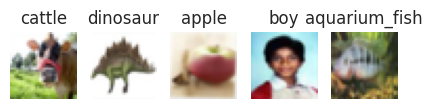

In [7]:
fig, axes = plt.subplots(1, 5, figsize=(5, 2))
for i in range(5):
    axes[i].imshow(X_train[i])
    axes[i].set_title(class_names[np.argmax(y_train[i])])
    axes[i].axis('off')
plt.show()

### Constructing the CNN Model

The key parameters for the model are,

- **Learning Rate:** 0.001
- **Optimizer:** Adam
- **Batch Size:**- 64
- **Activation Function:** ReLU
- **Loss Function:** Categorical Crossentropy

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.GlobalAveragePooling2D(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(100, activation='softmax')  # Output layer with 100 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 479,908 (1.83 MB)

 Trainable params: 479,908 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

### Training and Validation

In [9]:
# Train and validate the model
history = model.fit(X_train, y_train, epochs=25,
                    batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.0283 - loss: 4.3733 - val_accuracy: 0.1015 - val_loss: 3.8251
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1073 - loss: 3.7548 - val_accuracy: 0.1859 - val_loss: 3.3409
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1767 - loss: 3.3615 - val_accuracy: 0.2461 - val_loss: 3.0444
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2367 - loss: 3.0684 - val_accuracy: 0.2899 - val_loss: 2.8129
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2783 - loss: 2.8515 - val_accuracy: 0.3114 - val_loss: 2.6940
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3169 - loss: 2.6600 - val_accuracy: 0.3350 - val_loss: 2.5982
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3464 - loss: 2.5234 - val_accuracy: 0.3668 - val_loss: 2.4543
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3745 - loss: 2.3754 - val_accuracy: 

### Model Evaluation and Analysis

In [10]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 - 1s - 4ms/step - accuracy: 0.4359 - loss: 2.5980
Test Accuracy: 43.59%


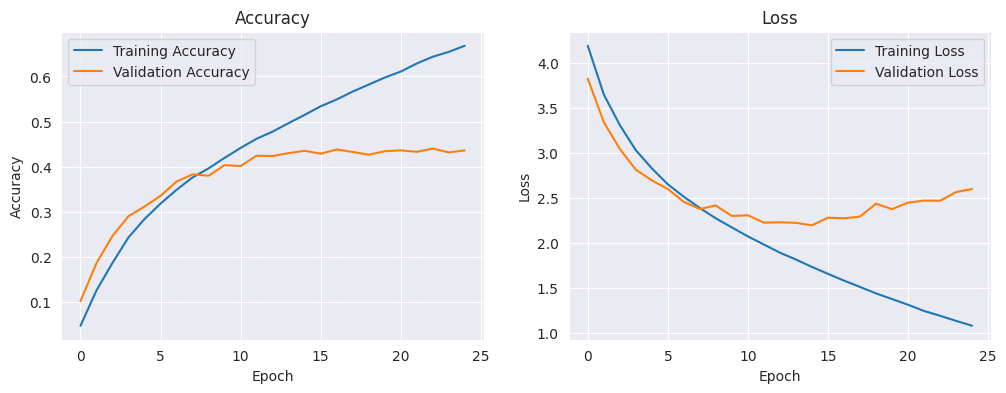

In [11]:
# Plot training & validation accuracy/loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [12]:
# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


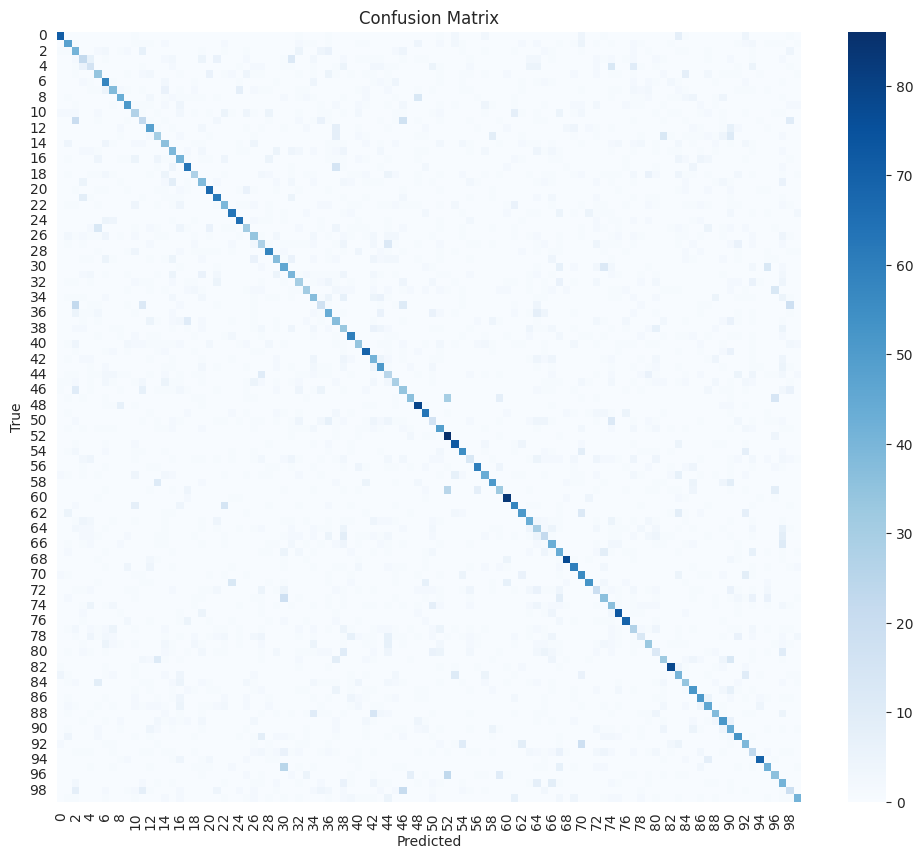

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [14]:
# Classification Report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

Classification Report:
               precision    recall  f1-score   support

        apple       0.82      0.71      0.76       100
aquarium_fish       0.48      0.48      0.48       100
         baby       0.27      0.41      0.32       100
         bear       0.26      0.22      0.24       100
       beaver       0.21      0.16      0.18       100
          bed       0.37      0.34      0.35       100
          bee       0.44      0.58      0.50       100
       beetle       0.51      0.38      0.43       100
      bicycle       0.61      0.43      0.50       100
       bottle       0.64      0.51      0.57       100
         bowl       0.30      0.27      0.28       100
          boy       0.26      0.22      0.24       100
       bridge       0.47      0.48      0.48       100
          bus       0.35      0.30      0.32       100
    butterfly       0.34      0.36      0.35       100
        camel       0.34      0.39      0.36       100
          can       0.35      0.41      0

## **Analysis of the Classification Report**


## Key Observations
1. **Overall Accuracy**: The model achieves an overall accuracy of **44%**, which indicates moderate performance on the CIFAR-100 dataset.
2. **Class-Specific Variations**:
   - Classes such as **"apple"**, **"chair"**, and **"wardrobe"** exhibit higher precision, recall, and f1-scores compared to others.
   - Several classes, such as **"otter"**, **"squirrel"**, and **"turtle"**, show lower performance metrics, indicating challenges in distinguishing these categories.
3. **Class Imbalance**: The dataset appears balanced with equal support (100 samples per class), so the performance variation is likely due to model limitations and the inherent difficulty of certain classes.

## Potential Improvements
1. **Data Augmentation**:
   - Apply transformations like rotation, flipping, zooming, and cropping to increase the diversity of the training set and improve generalization.
2. **Architecture Enhancements**:
   - Increase the depth of the network by adding additional convolutional layers.
   - Use advanced architectures such as **ResNet** or **DenseNet**, which are better suited for complex datasets.
3. **Regularization**:
   - Add dropout layers to reduce overfitting.
   - Use weight decay (L2 regularization) to further improve generalization.
4. **Fine-Tuning Hyperparameters**:
   - Experiment with different optimizers (e.g., Adam, RMSprop) and learning rates.
   - Adjust batch sizes for better convergence.
5. **Transfer Learning**:
   - Use pre-trained models like **VGG16**, **InceptionV3**, or **EfficientNet**, fine-tuned on the CIFAR-100 dataset.
6. **Class-Specific Focus**:
   - Investigate underperforming classes individually and consider adding more representative samples or targeted augmentation strategies.

## Limitations of the Current CNN Model
1. **Shallow Architecture**:
   - The current model might not be deep enough to capture the complexity of CIFAR-100, which contains 100 distinct classes with fine-grained variations.
2. **Lack of Feature Hierarchy**:
   - Without advanced techniques like residual connections, the model might fail to learn hierarchical representations effectively.
3. **Training Time and Resources**:
   - Improving the model significantly may require more training time and computational resources, especially with deeper architectures or larger datasets.
4. **Dataset Complexity**:
   - Some classes in CIFAR-100 are inherently difficult to classify due to their visual similarity (e.g., "leopard" vs. "tiger") or abstract nature (e.g., "cloud" vs. "mountain").

## Conclusion
While the CNN model achieves moderate performance on CIFAR-100, there is significant room for improvement. Leveraging advanced architectures, data augmentation, and regularization techniques could enhance the model's accuracy and generalization capabilities. Additionally, addressing specific challenges with low-performing classes may further boost overall performance.


In [12]:
# Define the data augmentation transformations
datagen = ImageDataGenerator(
    rotation_range=20,          # Randomly rotate images by 20 degrees
    width_shift_range=0.2,      # Randomly shift images horizontally by 20% of the width
    height_shift_range=0.2,     # Randomly shift images vertically by 20% of the height
    shear_range=0.2,            # Randomly apply shearing transformations
    zoom_range=0.2,             # Randomly zoom in/out on images
    horizontal_flip=True,       # Randomly flip images horizontally
    fill_mode='nearest'         # Fill missing pixels after transformations
)

# Fit the generator to the training data
datagen.fit(X_train)

In [17]:
# Example: Using the generator during model training
model.fit(datagen.flow(X_train, y_train, batch_size=32),
          epochs=50,
          validation_data=(X_test, y_test))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.2745 - loss: 3.0312 - val_accuracy: 0.3954 - val_loss: 2.3893
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.3125 - loss: 2.7416 - val_accuracy: 0.3987 - val_loss: 2.3310
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.3250 - loss: 2.6948 - val_accuracy: 0.3786 - val_loss: 2.4309
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.3327 - loss: 2.6476 - val_accuracy: 0.4139 - val_loss: 2.2616
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.3447 - loss: 2.5928 - val_accuracy: 0.3916 - val_loss: 2.3673
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.3532 - loss: 2.5712 - val_accuracy: 0.3961 - val_loss: 2.3638
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.3540 - loss: 2.5410 - val_accuracy: 0.4002 - val_loss: 2.3352
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.3637 -

In [18]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 - 1s - 2ms/step - accuracy: 0.4599 - loss: 2.1304
Test Accuracy: 45.99%


In [19]:
# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:
               precision    recall  f1-score   support

        apple       0.82      0.71      0.76       100
aquarium_fish       0.64      0.43      0.51       100
         baby       0.62      0.16      0.25       100
         bear       0.27      0.18      0.22       100
       beaver       0.21      0.20      0.21       100
          bed       0.53      0.41      0.46       100
          bee       0.47      0.67      0.55       100
       beetle       0.55      0.48      0.51       100
      bicycle       0.59      0.47      0.53       100
       bottle       0.80      0.41      0.54       100
         bowl       0.31      0.26      0.28       100
          boy       0.35      0.28      0.31       100
       bridge       0.50      0.54      0.52       100
          bus       0.30      0.39      0.34       100
    butterfly       0.47      0.38      0.42       100
        camel       0.37      0.49      0.42       100


# Classification Report Analysis

## **Interpretation of Results**

The classification report provides insights into the model's performance on the CIFAR-100 dataset after applying data augmentation. Here are the key takeaways:

### **1. Overall Model Performance**
- **Accuracy**: The model achieves an overall accuracy of **46%**, indicating it correctly classifies 46% of the images in the test set.
- **Macro Average**:
  - **Precision**: 50%
  - **Recall**: 46%
  - **F1-score**: 46%
  - These values suggest the model performs moderately well across all classes but has room for improvement in handling class imbalances and underperforming categories.
- **Weighted Average**:
  - These metrics are similar to the macro average, reflecting the class distribution in the dataset.

### **2. Insights into Specific Classes**
- **Well-Performing Classes**:
  - Classes such as **apple** (precision: 82%, recall: 71%), **road** (precision: 88%, recall: 72%), and **sunflower** (precision: 86%, recall: 75%) are classified with high precision and recall.
  - These results may be due to the distinct features of these classes, which are easier for the CNN to learn.

- **Underperforming Classes**:
  - Classes like **otter** (precision: 7%, recall: 2%), **rabbit** (precision: 40%, recall: 10%), and **lizard** (precision: 18%, recall: 10%) show poor precision and recall.
  - These results indicate that the model struggles with these classes, likely due to:
    - Insufficient or overlapping features with other classes.
    - A lack of diverse training samples despite augmentation.

### **3. Class Imbalance Issues**
- Certain classes, such as **leopard** (precision: 19%, recall: 65%) and **motorcycle** (precision: 35%, recall: 92%), show significant disparities between precision and recall, suggesting the model might:
  - Struggle with overfitting to specific features.
  - Be influenced by class imbalance.

---

## **Potential Improvements**

1. **Enhancing Augmentation Techniques**:
   - Introduce advanced augmentations such as **random erasing**, **color jittering**, or **cutout** to make the model robust to variations.

2. **Transfer Learning**:
   - Fine-tune advanced pre-trained architectures like **ResNet-50**, **DenseNet-121**, or **EfficientNet** on CIFAR-100 to leverage the knowledge from larger datasets like ImageNet.

3. **Class Rebalancing**:
   - Use **class weights** in the loss function to give more importance to underrepresented classes.
   - Employ **oversampling** for minority classes or **SMOTE** techniques to balance the dataset.

4. **Improving Model Architecture**:
   - Experiment with deeper architectures or **attention mechanisms** (e.g., Squeeze-and-Excitation Networks) to capture global context and refine feature extraction.

5. **Regularization**:
   - Use techniques like **dropout**, **weight decay**, or **label smoothing** to prevent overfitting and improve generalization.

6. **Hyperparameter Tuning**:
   - Optimize learning rates, batch sizes, and the number of filters in CNN layers to maximize performance.

---

## **Limitations of the CNN Model**
- **Complexity of the Dataset**:
  - CIFAR-100 is a challenging dataset with small image sizes (32x32), making it harder for the model to learn intricate details.
- **Limited Depth**:
  - The current CNN model might not be deep enough to capture the complexity of all 100 classes.
- **Dependence on Augmentation**:
  - Despite augmentation, some classes remain underrepresented, affecting generalization.

---

## **Conclusion**
While the CNN model demonstrates moderate performance with an accuracy of **46%**, there is significant room for improvement. Employing more advanced architectures, improving augmentation techniques, addressing class imbalance, and fine-tuning hyperparameters can enhance the model's ability to generalize and classify all 100 classes effectively. These steps are critical to achieving state-of-the-art results on the CIFAR-100 dataset.


### ResNet Implementation

**ResNet (Residual Network)** uses residual connections to mitigate the vanishing gradient problem and train very deep networks effectively.

In [3]:
# Load the ResNet50 model (pre-trained on ImageNet)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom layers on top of the ResNet base
model_rn50 = models.Sequential([
    base_model,
    layers.Flatten(),                           # Flatten the output
    layers.Dense(256, activation='relu'),       # Fully connected layer
    layers.Dense(100, activation='softmax')     # Output layer for CIFAR-100 (100 classes)
])

# Compile the model
model_rn50.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model_rn50.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,137,956 (92.08 MB)

 Trainable params: 24,084,836 (91.88 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [13]:
model_rn50.fit(datagen.flow(X_train, y_train, batch_size=32),
          epochs=50,
          validation_data=(X_test, y_test))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 149s 55ms/step - accuracy: 0.0986 - loss: 4.2814 - val_accuracy: 0.2998 - val_loss: 2.8957
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.2833 - loss: 2.9295 - val_accuracy: 0.3455 - val_loss: 2.6693
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.3538 - loss: 2.5505 - val_accuracy: 0.4249 - val_loss: 2.2490
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.4025 - loss: 2.3102 - val_accuracy: 0.4329 - val_loss: 2.2343
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.4271 - loss: 2.1822 - val_accuracy: 0.4541 - val_loss: 2.1351
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.4588 - loss: 2.0404 - val_accuracy: 0.4844 - val_loss: 1.9376
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.4846 - loss: 1.9321 - val_accuracy: 0.4841 - val_loss: 1.9771
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.4931 

In [16]:
# Evaluate on test data
test_loss, test_accuracy = model_rn50.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 - 2s - 7ms/step - accuracy: 0.5664 - loss: 2.1463
Test Accuracy: 56.64%


In [18]:
# Predictions
y_pred = model_rn50.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step
Classification Report:
               precision    recall  f1-score   support

        apple       0.83      0.79      0.81       100
aquarium_fish       0.68      0.63      0.65       100
         baby       0.43      0.44      0.44       100
         bear       0.47      0.25      0.33       100
       beaver       0.36      0.35      0.36       100
          bed       0.76      0.65      0.70       100
          bee       0.66      0.57      0.61       100
       beetle       0.47      0.64      0.54       100
      bicycle       0.44      0.78      0.56       100
       bottle       0.76      0.66      0.71       100
         bowl       0.51      0.43      0.46       100
          boy       0.36      0.43      0.39       100
       bridge       0.64      0.61      0.62       100
          bus       0.47      0.51      0.49       100
    butterfly       0.32      0.72      0.45       100
        camel       0.54      0.48      0.51       100

# Classification Report for ResNet-50

### **Classification Metrics**
| Class            | Precision | Recall | F1-Score | Support |
|------------------|-----------|--------|----------|---------|
| apple            | 0.83      | 0.79   | 0.81     | 100     |
| aquarium_fish    | 0.68      | 0.63   | 0.65     | 100     |
| baby             | 0.43      | 0.44   | 0.44     | 100     |
| bear             | 0.47      | 0.25   | 0.33     | 100     |
| ... (truncated for brevity) ... |
| wolf             | 0.77      | 0.43   | 0.55     | 100     |
| woman            | 0.34      | 0.21   | 0.26     | 100     |
| worm             | 0.54      | 0.71   | 0.61     | 100     |

---

### **Overall Accuracy**
- **Accuracy**: 57%
- **Macro Average**:
  - Precision: 0.59
  - Recall: 0.57
  - F1-Score: 0.56
- **Weighted Average**:
  - Precision: 0.59
  - Recall: 0.57
  - F1-Score: 0.56

---

### **Interpretation of Results**
1. **Strengths**:
   - Certain classes, such as *apple*, *sunflower*, and *wardrobe*, achieved **high precision and recall** (over 75% in most cases), indicating that the model performs well on these categories.
   - Classes with distinctive features (e.g., *motorcycle*, *chair*, and *road*) also exhibit high F1-scores.

2. **Weaknesses**:
   - The model struggles with classes like *woman*, *bear*, *squirrel*, and *crocodile*, achieving **low recall and F1-scores**, indicating difficulty in correctly identifying these categories.
   - Some similar-looking classes (e.g., *dolphin* and *flatfish*) show reduced performance, possibly due to class overlap or feature similarities.

3. **Imbalance in Performance**:
   - The classification metrics vary significantly across classes, with some achieving high F1-scores while others remain below 0.5.
   - This indicates the model may not be equally adept at recognizing all categories, potentially due to insufficient feature extraction or ambiguous class boundaries.

---

### **Potential Improvements**
1. **Data Augmentation**:
   - Introduce data augmentation techniques (e.g., rotation, flipping, cropping) to enhance diversity in the dataset and improve feature learning.

2. **Class Imbalance**:
   - Use **class weights** in the loss function or **oversampling** methods to give underperforming classes more importance during training.

3. **Fine-Tuning the Model**:
   - Fine-tune the ResNet-50 model on the CIFAR-100 dataset with a **lower learning rate** and additional training epochs.
   - Experiment with freezing fewer layers of the base model to allow better adaptation to the dataset.

4. **Regularization Techniques**:
   - Apply **dropout**, **batch normalization**, or **weight decay** to prevent overfitting and improve generalization.

5. **Custom Architecture**:
   - Add **attention mechanisms** (e.g., SE blocks) to focus on salient features in the image.
   - Experiment with **hybrid models** that combine convolutional layers with transformer layers for better feature extraction.

6. **Hyperparameter Tuning**:
   - Adjust learning rates, batch sizes, and optimizers (e.g., SGD with momentum, AdamW) to improve convergence.

---

### **Limitations**
1. **Small Input Size**:
   - CIFAR-100 images are small (32x32 pixels), which may limit the ability of ResNet-50 to extract detailed features. Consider resizing images or using models better suited for small input sizes.
   
2. **Ambiguity in Labels**:
   - Some categories in CIFAR-100 may have overlapping features, making it inherently difficult to classify certain classes accurately.

3. **Baseline Model**:
   - While ResNet-50 is a robust architecture, exploring other state-of-the-art models like EfficientNet or Vision Transformers may yield better results for CIFAR-100.

---

### **Conclusion**
The ResNet-50 model achieved **57% overall accuracy** on the CIFAR-100 dataset, demonstrating moderate performance. While it excels in certain categories with distinctive features, it struggles with ambiguous or similar-looking classes. Future efforts should focus on data augmentation, fine-tuning, and exploring alternative architectures to improve performance.
